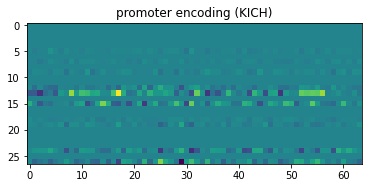

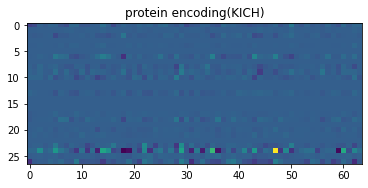

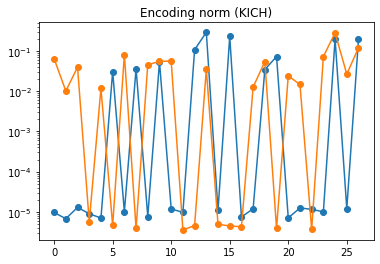

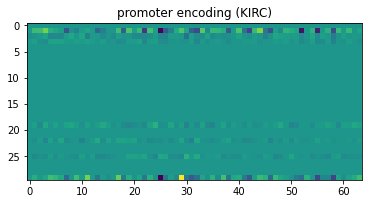

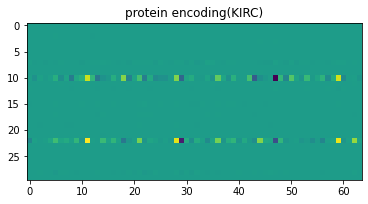

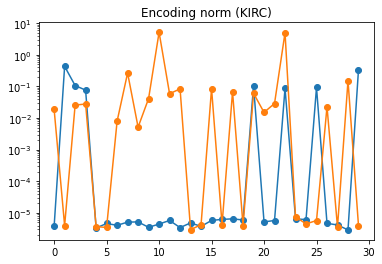

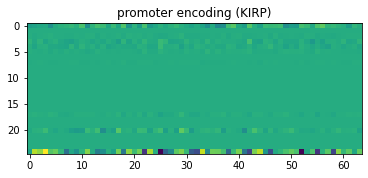

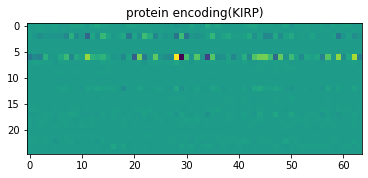

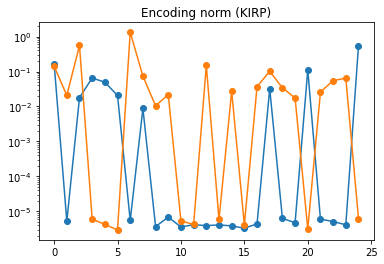

In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np


# Loading and demoing the structure of the files

filename = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/raw/KICH/TCGA-KL-8323-01A-21D-2310-10.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding (KICH)")
plt.show()

plt.imshow(prot)
plt.title("protein encoding(KICH)")
plt.show()

# Why are some norms so small?
# Perhaps we can drop the genese were the norm is small for both promoter and the protein?
plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm (KICH)")
plt.show()


# Another example

filename = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/raw/KIRC/TCGA-6D-AA2E-01A-11D-A36X-10.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding (KIRC)")
plt.show()

plt.imshow(prot)
plt.title("protein encoding(KIRC)")
plt.show()

plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm (KIRC)")
plt.show()


# Another example

filename = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/raw/KIRP/TCGA-2Z-A9J8-01A-11D-A42J-10.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding (KIRP)")
plt.show()

plt.imshow(prot)
plt.title("protein encoding(KIRP)")
plt.show()

plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm (KIRP)")
plt.show()

Error files:  {'KICH': [], 'KIRC': [], 'KIRP': []}
Cancer types per folder files numbers: {'KICH': 1, 'KIRC': 1, 'KIRP': 1}
Duplicates per type: {'KICH': 0, 'KIRC': 0, 'KIRP': 0}
Samples without data:  {'KICH': [], 'KIRC': [], 'KIRP': []}


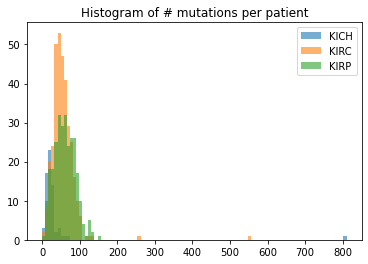

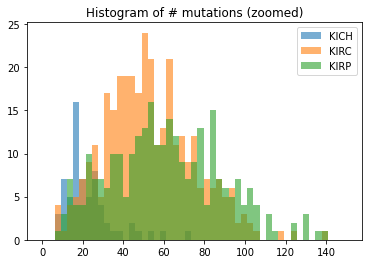

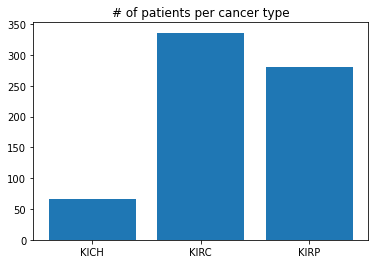

In [2]:
# Looking at the distribution of the mutations

from matplotlib import pyplot as plt
import h5py
import numpy as np
import os
from os.path import isfile, join

types = ["KICH", "KIRC", "KIRP"]

dataroot = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/raw/"

cancer_types = {type: [] for type in types}
num_mutations = {type: [] for type in types}
error_samples = {type: [] for type in types}
sample_IDs = {type: [] for type in types}
nodata = {type: [] for type in types}
for type in types:
    datapath = dataroot + type
    files = [
        join(datapath, f) for f in os.listdir(datapath) if isfile(join(datapath, f))
    ]
    for file in files:
        with h5py.File(file, "r") as f:

            try:
                cancer_types[type].append(f["label"]["sample_meta"]["tumor"][()])
                num_mutations[type].append(len(f["meta"]["mutated_gene_list"][()]))
                sample_IDs[type].append(f["label"]["sample_id"][()])
                if "data" not in f.keys():
                    nodata[type].append(file)
            except:
                error_samples[type].append(file)

# The reference gene file is the only one that errors out
print("Error files: ", error_samples)

# Types of cancer per folder:
print(
    "Cancer types per folder files numbers:",
    {key: len(set(value)) for key, value in cancer_types.items()},
)

print(
    "Duplicates per type:",
    {key: len(set(value)) - len(value) for key, value in sample_IDs.items()},
)

print("Samples without data: ", nodata)


[
    plt.hist(value, bins=np.linspace(0, 810, 100), label=key, alpha=0.6)
    for key, value in num_mutations.items()
]
plt.title("Histogram of # mutations per patient")
plt.legend()
plt.show()

[
    plt.hist(value, bins=np.linspace(0, 150, 50), label=key, alpha=0.6)
    for key, value in num_mutations.items()
]
plt.title("Histogram of # mutations (zoomed)")
plt.legend()
plt.show()


plt.bar(cancer_types.keys(), [len(el) for el in cancer_types.values()])
plt.title("# of patients per cancer type")
plt.show()

Processing...


loading gene graph took 148.17 seconds.


read samples: 100%|██████████| 683/683 [14:29<00:00,  1.27s/it]


Loading dataset took 869.38 seconds.
Caching processed dataset...
 done (took 0.29 seconds).
Full processing pipeline took 1017.88 seconds.


Done!


Epoch: 10, Loss: 0.0948, Train Acc: 0.4574
valid Loss: 0.0908, Acc: 0.4700
Epoch: 20, Loss: 0.0903, Train Acc: 0.4745
valid Loss: 0.0889, Acc: 0.5400
Epoch: 30, Loss: 0.0814, Train Acc: 0.5128
valid Loss: 0.109, Acc: 0.4400
Epoch: 40, Loss: 0.0727, Train Acc: 0.6468
valid Loss: 0.135, Acc: 0.4000
Epoch: 50, Loss: 0.0616, Train Acc: 0.6979
valid Loss: 0.182, Acc: 0.4300
Epoch: 60, Loss: 0.062, Train Acc: 0.7191
valid Loss: 0.186, Acc: 0.4800
Epoch: 70, Loss: 0.0489, Train Acc: 0.7766
valid Loss: 0.255, Acc: 0.4800
Epoch: 80, Loss: 0.0475, Train Acc: 0.7957
valid Loss: 0.41, Acc: 0.3600
Epoch: 90, Loss: 0.0462, Train Acc: 0.8085
valid Loss: 0.28, Acc: 0.4200
Epoch: 100, Loss: 0.0418, Train Acc: 0.8234
valid Loss: 0.405, Acc: 0.4400


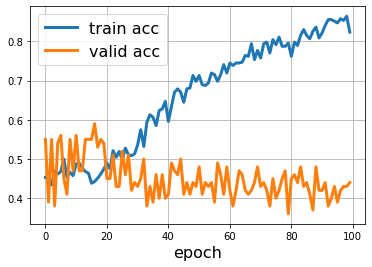

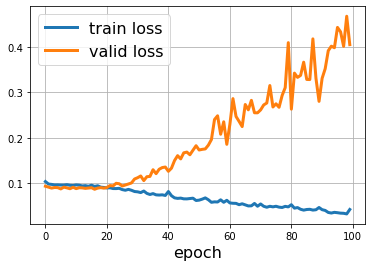

AUCs one-vs-rest: Train: 0.957, valid: 0.605
AUCs one-vs-one: Train: 0.956, valid: 0.621


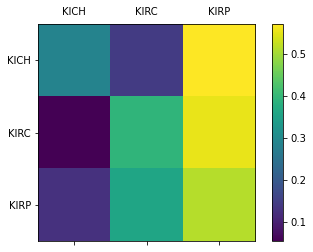

In [3]:
# Training on kidney data using GCN architecture (3 way classification)

# Hyperparameters etc:

arch = "GCN"
batch = 10
parall = False
lr = 0.006

import sys

sys.path.insert(0, "..")
import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/kidney"
files = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/samples.txt"
label_mapping = ["KICH", "KIRC", "KIRP"]
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="global.geneSymbol.gz",
)


train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.train_idx),
    drop_last=True,
)
valid_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.valid_idx),
    drop_last=True,
)


model = GCNNet(num_classes=3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    # if epoch == 30:
    #     for param_group in optimizer.param_groups:
    #         param_group["lr"] = lr * 0.5

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def valid():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in valid_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
valid_acces = []
valid_losses = []
for epoch in range(1, 101):
    report = (epoch) % 10 == 0
    train_loss, train_acc = train(epoch, report=report)
    valid_loss, valid_acc = valid()
    train_losses.append(train_loss.cpu().detach().numpy())
    valid_losses.append(valid_loss)
    train_acces.append(train_acc)
    valid_acces.append(valid_acc)
    if report:
        print("valid Loss: {:.3g}, Acc: {:.4f}".format(valid_loss, valid_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(valid_acces, label="valid acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(valid_losses, c="tab:orange", label="valid loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.train_idx),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)).cpu().data.numpy())
    ys.append(tb.y.cpu().numpy())

outs = np.concatenate(outs)
ys = np.concatenate(ys)

train_auc_ovo = roc_auc_score(ys, outs, multi_class="ovo")
train_auc_ovr = roc_auc_score(ys, outs, multi_class="ovr")

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.valid_idx),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)).cpu().data.numpy())
    ys.append(tb.y.cpu().numpy())

outs = np.concatenate(outs)
ys = np.concatenate(ys)

valid_auc_ovo = roc_auc_score(ys, outs, multi_class="ovo")
valid_auc_ovr = roc_auc_score(ys, outs, multi_class="ovr")

print(
    "AUCs one-vs-rest: Train: {:.3f}, valid: {:.3f}".format(train_auc_ovr, valid_auc_ovr)
)
print(
    "AUCs one-vs-one: Train: {:.3f}, valid: {:.3f}".format(train_auc_ovo, valid_auc_ovo)
)

confusion = confusion_matrix(y_true=ys, y_pred=outs.argmax(1), normalize="true")

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)
im = ax.imshow(confusion)
ax.set_xticks([0, 1, 2], label_mapping)
ax.set_yticks([0, 1, 2], label_mapping)
plt.colorbar(im)
plt.show()

Processing...


loading gene graph took 165.09 seconds.


read samples: 100%|██████████| 683/683 [14:38<00:00,  1.29s/it]


Loading dataset took 878.25 seconds.
Pre-transforming took 0.35 seconds.
Caching processed dataset...
 done (took 1.03 seconds).
Full processing pipeline took 1044.75 seconds.


Done!


Epoch: 20, Loss: 0.083, Train Acc: 0.6362
valid Loss: 0.104, Acc: 0.5300
Epoch: 40, Loss: 0.0409, Train Acc: 0.8383
valid Loss: 0.121, Acc: 0.5400
Epoch: 60, Loss: 0.0291, Train Acc: 0.8936
valid Loss: 0.129, Acc: 0.5600
Epoch: 80, Loss: 0.022, Train Acc: 0.9170
valid Loss: 0.212, Acc: 0.4900
Epoch: 100, Loss: 0.0121, Train Acc: 0.9574
valid Loss: 0.225, Acc: 0.4700
Epoch: 120, Loss: 0.0122, Train Acc: 0.9468
valid Loss: 0.251, Acc: 0.4700
Epoch: 140, Loss: 0.0126, Train Acc: 0.9489
valid Loss: 0.414, Acc: 0.5200
Epoch: 160, Loss: 0.0124, Train Acc: 0.9638
valid Loss: 0.336, Acc: 0.4500
Epoch: 180, Loss: 0.00991, Train Acc: 0.9723
valid Loss: 0.246, Acc: 0.5100
Epoch: 200, Loss: 0.00717, Train Acc: 0.9809
valid Loss: 0.251, Acc: 0.5200


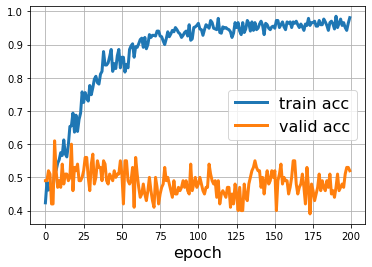

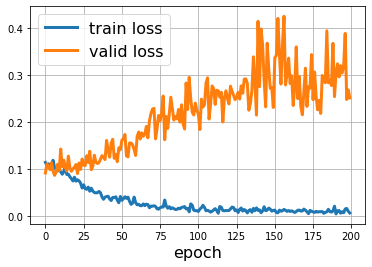

AUCs one-vs-rest: Train: 0.998, valid: 0.662
AUCs one-vs-one: Train: 0.998, valid: 0.669


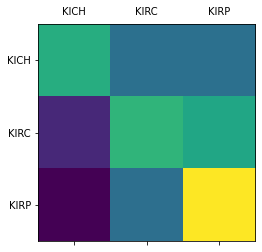

In [4]:
# Training on kidney data using GCN2 architecture  (3 way classification)

# Hyperparameters etc:

arch = "GCN2"
batch = 10
parall = False
lr = 0.003

import sys

sys.path.insert(0, "..")
import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/kidney"
files = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/samples.txt"
label_mapping = ["KICH", "KIRC", "KIRP"]

pre_transform = T.Compose([T.GCNNorm(), T.ToSparseTensor()])
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="global.geneSymbol.gz",
    pre_transform=pre_transform,
    suffix="sparse",
)


train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.train_idx),
    drop_last=True,
)
valid_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.valid_idx),
    drop_last=True,
)

model = GCN2Net(
    hidden_channels=2048,
    num_layers=4,
    num_classes=3,
    alpha=0.5,
    theta=1.0,
    shared_weights=False,
    dropout=0.2,
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    # if epoch == 30:
    #     for param_group in optimizer.param_groups:
    #         param_group["lr"] = lr * 0.5

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def valid():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in valid_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
valid_acces = []
valid_losses = []
for epoch in range(1, 201):
    report = (epoch) % 20 == 0
    train_loss, train_acc = train(epoch, report=report)
    valid_loss, valid_acc = valid()
    train_losses.append(train_loss.cpu().detach().numpy())
    valid_losses.append(valid_loss)
    train_acces.append(train_acc)
    valid_acces.append(valid_acc)
    if report:
        print("valid Loss: {:.3g}, Acc: {:.4f}".format(valid_loss, valid_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(valid_acces, label="valid acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(valid_losses, c="tab:orange", label="valid loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.train_idx),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)).cpu().data.numpy())
    ys.append(tb.y.cpu().numpy())

outs = np.concatenate(outs)
ys = np.concatenate(ys)

train_auc_ovo = roc_auc_score(ys, outs, multi_class="ovo")
train_auc_ovr = roc_auc_score(ys, outs, multi_class="ovr")

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.valid_idx),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)).cpu().data.numpy())
    ys.append(tb.y.cpu().numpy())

outs = np.concatenate(outs)
ys = np.concatenate(ys)

valid_auc_ovo = roc_auc_score(ys, outs, multi_class="ovo")
valid_auc_ovr = roc_auc_score(ys, outs, multi_class="ovr")

print(
    "AUCs one-vs-rest: Train: {:.3f}, valid: {:.3f}".format(train_auc_ovr, valid_auc_ovr)
)
print(
    "AUCs one-vs-one: Train: {:.3f}, valid: {:.3f}".format(train_auc_ovo, valid_auc_ovo)
)

confusion = confusion_matrix(y_true=ys, y_pred=outs.argmax(1), normalize="true")

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)
ax.imshow(confusion)
ax.set_xticks([0, 1, 2], label_mapping)
ax.set_yticks([0, 1, 2], label_mapping)
plt.show()

Processing...


loading gene graph took 165.22 seconds.


read samples: 100%|██████████| 683/683 [14:36<00:00,  1.28s/it]


Loading dataset took 876.50 seconds.
Caching processed dataset...
 done (took 0.29 seconds).
Full processing pipeline took 1042.05 seconds.


Done!


Epoch: 10, Loss: 0.0664, Train Acc: 0.5745
valid Loss: 0.07, Acc: 0.6100
Epoch: 20, Loss: 0.0637, Train Acc: 0.6000
valid Loss: 0.0795, Acc: 0.6100
Epoch: 30, Loss: 0.0598, Train Acc: 0.6149
valid Loss: 0.0951, Acc: 0.5300
Epoch: 40, Loss: 0.0505, Train Acc: 0.6936
valid Loss: 0.154, Acc: 0.4500
Epoch: 50, Loss: 0.0507, Train Acc: 0.6915
valid Loss: 0.173, Acc: 0.5600
Epoch: 60, Loss: 0.0405, Train Acc: 0.7809
valid Loss: 0.242, Acc: 0.5200
Epoch: 70, Loss: 0.0404, Train Acc: 0.7638
valid Loss: 0.28, Acc: 0.5100
Epoch: 80, Loss: 0.0296, Train Acc: 0.8319
valid Loss: 0.384, Acc: 0.4800
Epoch: 90, Loss: 0.0228, Train Acc: 0.8787
valid Loss: 0.524, Acc: 0.4900
Epoch: 100, Loss: 0.0227, Train Acc: 0.8809
valid Loss: 0.608, Acc: 0.4900
Epoch: 110, Loss: 0.0195, Train Acc: 0.9000
valid Loss: 0.574, Acc: 0.4600
Epoch: 120, Loss: 0.021, Train Acc: 0.8915
valid Loss: 0.705, Acc: 0.4600
Epoch: 130, Loss: 0.0174, Train Acc: 0.9106
valid Loss: 0.794, Acc: 0.4600
Epoch: 140, Loss: 0.0156, Train Acc

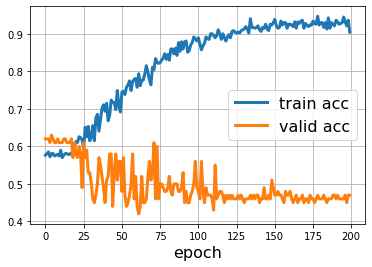

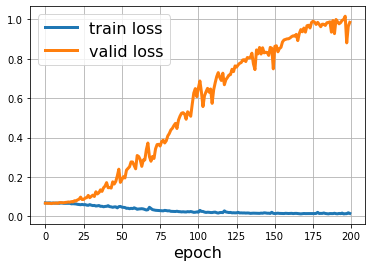

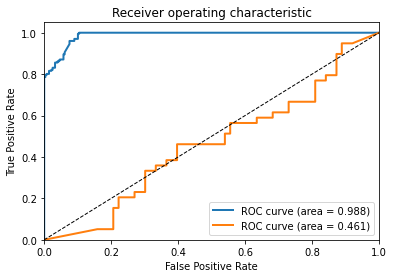

In [5]:
# Training on kidney data using GCN architecture (binary classification)

# Hyperparameters etc:

arch = "GCN"
batch = 10
parall = False
lr = 0.005

import sys

sys.path.insert(0, "..")
import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/kidney"
files = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/samples.txt"
label_mapping = {"KICH": 0, "KIRC": 0, "KIRP": 1}
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="global.geneSymbol.gz",
    suffix="binary",
)



train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.train_idx),
    drop_last=True,
)
valid_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.valid_idx),
    drop_last=True,
)


model = GCNNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    if epoch == 70:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.5

    if epoch == 120:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.1

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def valid():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in valid_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
valid_acces = []
valid_losses = []
for epoch in range(1, 201):
    report = (epoch) % 10 == 0
    train_loss, train_acc = train(epoch, report=report)
    valid_loss, valid_acc = valid()
    train_losses.append(train_loss.cpu().detach().numpy())
    valid_losses.append(valid_loss)
    train_acces.append(train_acc)
    valid_acces.append(valid_acc)
    if report:
        print("valid Loss: {:.3g}, Acc: {:.4f}".format(valid_loss, valid_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(valid_acces, label="valid acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(valid_losses, c="tab:orange", label="valid loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.train_idx),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)).cpu().data.numpy())
    ys.append(tb.y.cpu().numpy())

outs = np.concatenate(outs)
ys = np.concatenate(ys)

fpr_train, tpr_train, _ = roc_curve(ys, outs[:, 1])
train_auc = auc(fpr_train, tpr_train)

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.valid_idx),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)).cpu().data.numpy())
    ys.append(tb.y.cpu().numpy())

outs = np.concatenate(outs)
ys = np.concatenate(ys)

fpr_valid, tpr_valid, _ = roc_curve(ys, outs[:, 1])
valid_auc = auc(fpr_valid, tpr_valid)

plt.plot(
    fpr_train, tpr_train, lw=2, label="ROC curve (area = %0.3f)" % train_auc,
)
plt.plot(
    fpr_valid, tpr_valid, lw=2, label="ROC curve (area = %0.3f)" % valid_auc,
)
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Epoch: 20, Loss: 0.0692, Train Acc: 0.5957
valid Loss: 0.0723, Acc: 0.5300
Epoch: 40, Loss: 0.0646, Train Acc: 0.6340
valid Loss: 0.0649, Acc: 0.6700
Epoch: 60, Loss: 0.0633, Train Acc: 0.6404
valid Loss: 0.0684, Acc: 0.6100
Epoch: 80, Loss: 0.0622, Train Acc: 0.6468
valid Loss: 0.0621, Acc: 0.6900
Epoch: 100, Loss: 0.0601, Train Acc: 0.6596
valid Loss: 0.0645, Acc: 0.6500
Epoch: 120, Loss: 0.0552, Train Acc: 0.7000
valid Loss: 0.0703, Acc: 0.6600
Epoch: 140, Loss: 0.0585, Train Acc: 0.6872
valid Loss: 0.0714, Acc: 0.6200
Epoch: 160, Loss: 0.0546, Train Acc: 0.7106
valid Loss: 0.0713, Acc: 0.6200
Epoch: 180, Loss: 0.0518, Train Acc: 0.7489
valid Loss: 0.0744, Acc: 0.6300
Epoch: 200, Loss: 0.0489, Train Acc: 0.7574
valid Loss: 0.0735, Acc: 0.6200
Epoch: 220, Loss: 0.0515, Train Acc: 0.7574
valid Loss: 0.0723, Acc: 0.6500
Epoch: 240, Loss: 0.0515, Train Acc: 0.7362
valid Loss: 0.0724, Acc: 0.6300
Epoch: 260, Loss: 0.0527, Train Acc: 0.7511
valid Loss: 0.0728, Acc: 0.6400
Epoch: 280, Loss

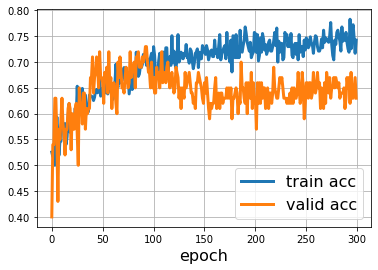

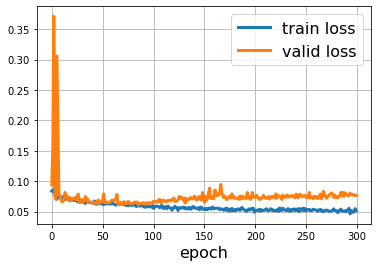

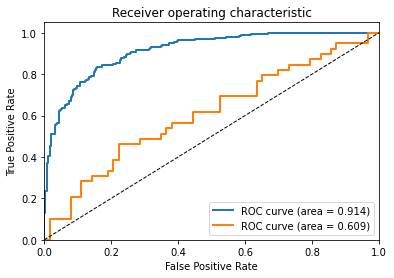

In [7]:
# Training on kidney data using GCN2 architecture

# Hyperparameters etc:

arch = "GCN2"
batch = 10
parall = False
lr = 0.005

import sys

sys.path.insert(0, "..")
import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/kidney"
files = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/samples.txt"
label_mapping = {"KICH": 0, "KIRC": 0, "KIRP": 1}
pre_transform = T.Compose([T.GCNNorm(), T.ToSparseTensor()])
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="global.geneSymbol.gz",
    pre_transform=pre_transform,
    suffix="sparse_binary",
)



train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.train_idx),
    drop_last=True,
)
valid_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.valid_idx),
    drop_last=True,
)


model = GCN2Net(
    hidden_channels=1024,
    num_layers=4,
    alpha=0.5,
    theta=1.0,
    shared_weights=False,
    dropout=0.8,
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    if epoch == 40:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.5

    if epoch == 90:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.1

    if epoch == 170:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.03

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def valid():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in valid_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
valid_acces = []
valid_losses = []
for epoch in range(1, 301):
    report = (epoch) % 20 == 0
    train_loss, train_acc = train(epoch, report=report)
    valid_loss, valid_acc = valid()
    train_losses.append(train_loss.cpu().detach().numpy())
    valid_losses.append(valid_loss)
    train_acces.append(train_acc)
    valid_acces.append(valid_acc)
    if report:
        print("valid Loss: {:.3g}, Acc: {:.4f}".format(valid_loss, valid_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(valid_acces, label="valid acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(valid_losses, c="tab:orange", label="valid loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.train_idx),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)).cpu().data.numpy())
    ys.append(tb.y.cpu().numpy())

outs = np.concatenate(outs)
ys = np.concatenate(ys)

fpr_train, tpr_train, _ = roc_curve(ys, outs[:, 1])
train_auc = auc(fpr_train, tpr_train)

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(dataset.valid_idx),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)).cpu().data.numpy())
    ys.append(tb.y.cpu().numpy())

outs = np.concatenate(outs)
ys = np.concatenate(ys)

fpr_valid, tpr_valid, _ = roc_curve(ys, outs[:, 1])
valid_auc = auc(fpr_valid, tpr_valid)

plt.plot(
    fpr_train, tpr_train, lw=2, label="ROC curve (area = %0.3f)" % train_auc,
)
plt.plot(
    fpr_valid, tpr_valid, lw=2, label="ROC curve (area = %0.3f)" % valid_auc,
)
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()